In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [2]:
%matplotlib inline

In [3]:
metal = cv.imread('./material_TPs/TP2/metalgrid.jpg', cv.IMREAD_GRAYSCALE)
metal.shape

(350, 735)

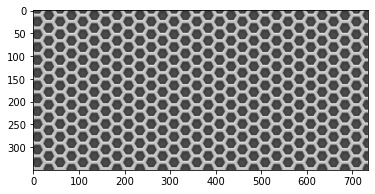

In [4]:
plt.imshow(metal, cmap='gray', vmin=0, vmax=255)
plt.show()

In [5]:
#suavizado gaussiano
blur = cv.GaussianBlur(metal,(5,5),0)

In [6]:
#gradientes
# X
sobelx_64 = cv.Sobel(blur,cv.CV_32F,1,0,ksize=3)
absx_64 = np.absolute(sobelx_64)
sobelx_8u1 = absx_64/absx_64.max()*255
sobelx_8u = np.uint8(sobelx_8u1)

In [7]:
#Y
sobely_64 = cv.Sobel(blur,cv.CV_32F,0,1,ksize=3)
absy_64 = np.absolute(sobely_64)
sobely_8u1 = absy_64/absy_64.max()*255
sobely_8u = np.uint8(sobely_8u1)

In [8]:
#magnitud

mag = np.hypot(sobelx_8u, sobely_8u)
mag = mag/mag.max()*255
mag = np.uint8(mag)

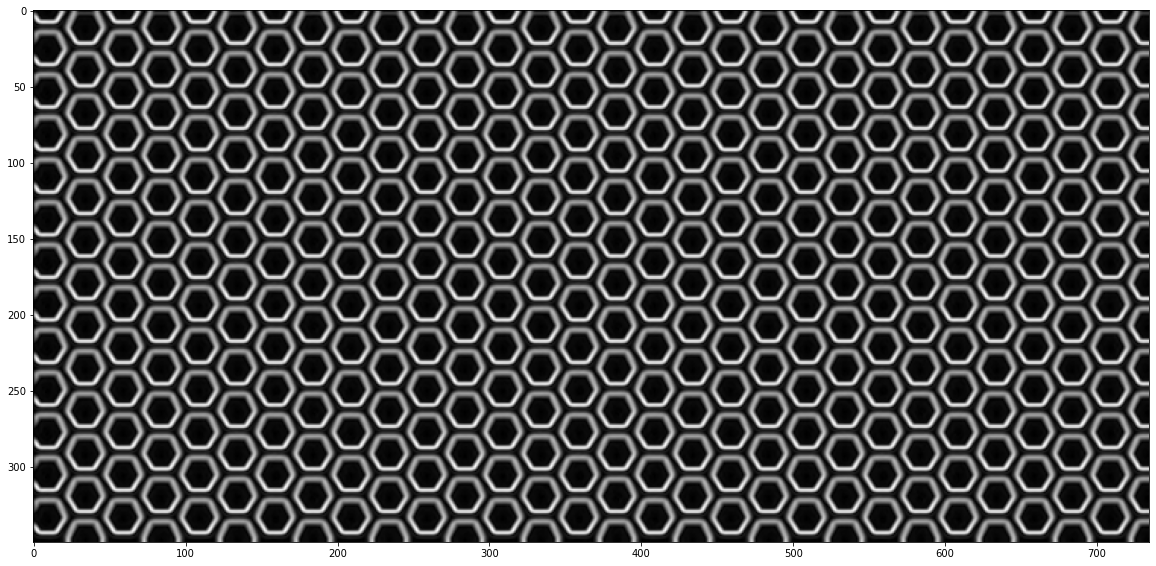

In [9]:
plt.figure(figsize = (20,20))
plt.imshow(mag, cmap='gray', vmin=0, vmax=255)
plt.show()

In [10]:
#angulo
theta = np.arctan2(sobely_64, sobelx_64)
angle = np.rad2deg(theta)
angle.shape

(350, 735)

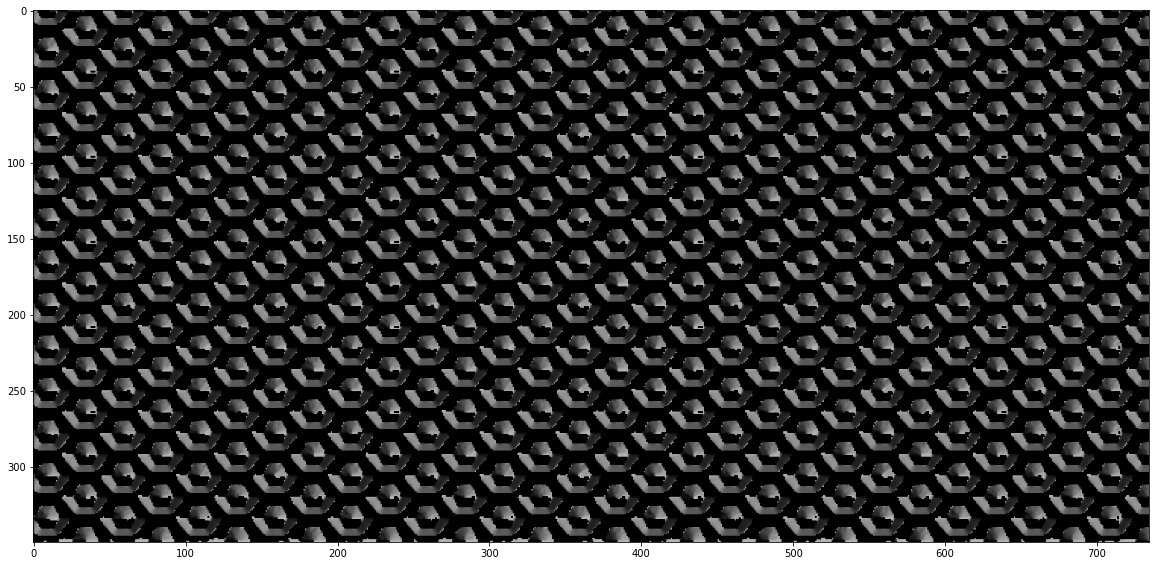

In [11]:
plt.figure(figsize = (20,20))
plt.imshow(angle, cmap='gray', vmin=0, vmax=255)
plt.show()

In [12]:
mag_max = np.where(mag == 255)
x_mag_max = mag_max[0]
y_mag_max = mag_max[1]


In [13]:
angles = angle[mag_max]
angles

array([147.50598, 147.50598, 147.50598, 147.50598, 147.50598, 147.50598,
       147.50598, 147.50598, 147.50598, 147.50598, 147.50598, 147.50598,
       147.50598, 147.50598, 147.50598, 147.50598, 147.50598, 147.50598,
       147.50598, 147.50598], dtype=float32)

In [192]:
angulos = np.where(angle == 0)
x_angulos = angulos[0]
y_angulos = angulos[1]

print(x_angulos)
print(y_angulos)

[  0   0   0 ... 349 349 349]
[  0   3   4 ... 732 733 734]
